In [1]:
import pandas as pd

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
df = pd.read_csv('readyforEDA.csv')

In [8]:
df = df[df['improvement_3_years'] != 0]
pd.set_option('display.max_columns', None)

In [11]:
df.columns

Index(['player_id', 'fifa_version', 'long_name', 'player_positions', 'overall',
       'potential', 'age', 'height_cm', 'weight_kg', 'nationality_id',
       'nationality_name', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tac

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


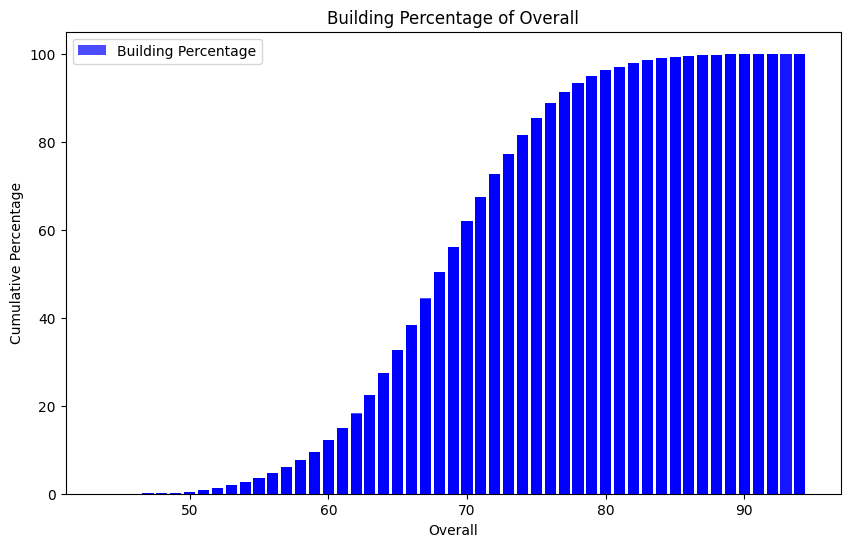

<Figure size 640x480 with 0 Axes>

In [12]:
df['Percentage'] = df['overall'] / df['overall'].sum() * 100


df.sort_values(by='overall', inplace=True)


df['Cumulative_Percentage'] = df['Percentage'].cumsum()


plt.figure(figsize=(10, 6))
plt.bar(df['overall'], df['Cumulative_Percentage'], color='blue', alpha=0.7, label='Building Percentage')
plt.xlabel('Overall')
plt.ylabel('Cumulative Percentage')
plt.title('Building Percentage of Overall')
plt.legend()

plt.show()


plt.savefig('overall distribution.png')

In [13]:
percentile_90_value = np.percentile(df['overall'], 90)
print(f'The value at the 90th percentile is: {percentile_90_value}')

The value at the 90th percentile is: 76.0


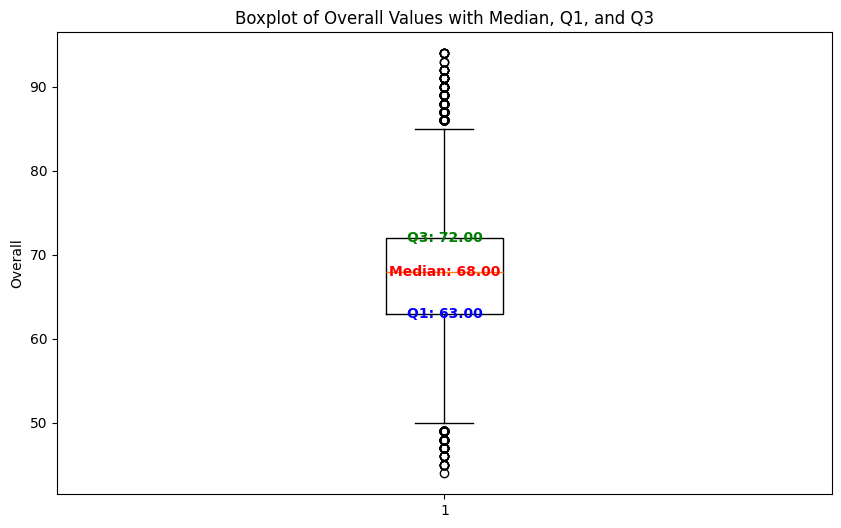

In [15]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['overall'], showfliers=True)

median = box['medians'][0].get_ydata()[0]
q1 = box['boxes'][0].get_ydata()[0]
q3 = box['boxes'][0].get_ydata()[2]

plt.text(1, median, f'Median: {median:.2f}', ha='center', va='center', fontweight='bold', color='red')
plt.text(1, q1, f'Q1: {q1:.2f}', ha='center', va='center', fontweight='bold', color='blue')
plt.text(1, q3, f'Q3: {q3:.2f}', ha='center', va='center', fontweight='bold', color='green')

plt.ylabel('Overall')
plt.title('Boxplot of Overall Values with Median, Q1, and Q3')
plt.show()



Text(0, 0.5, '$p$')

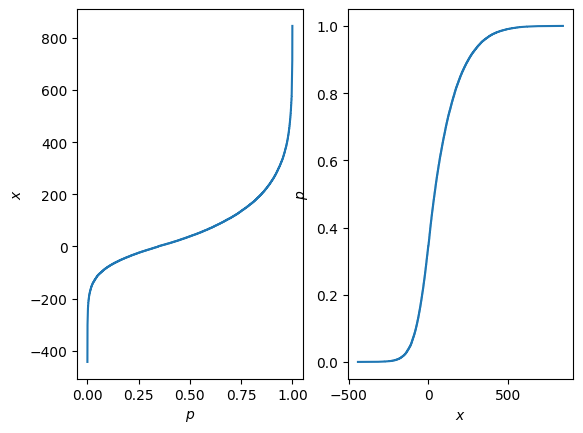

In [16]:
data = df['improvement_3_years']

data_sorted = np.sort(data)

p = 1. * np.arange(len(data)) / (len(data) - 1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')


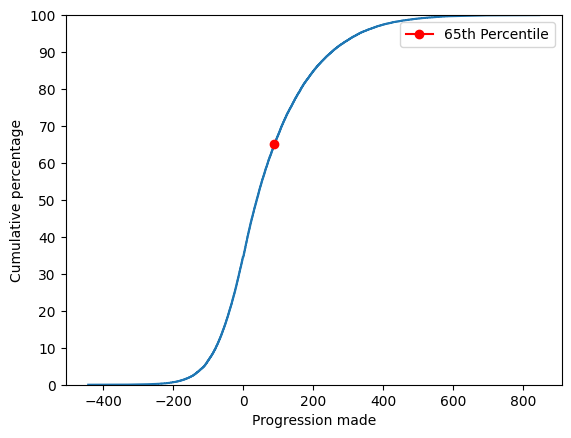

<Figure size 640x480 with 0 Axes>

In [17]:
data = df['improvement_3_years']

data_sorted = np.sort(data)

p = 100. * np.arange(len(data)) / (len(data) - 1)

fig, ax2 = plt.subplots()
ax2.plot(data_sorted, p)
ax2.set_xlabel('Progression made')
ax2.set_ylabel('Cumulative percentage')

percent_65 = np.percentile(data_sorted, 65)
ax2.plot(percent_65, 65, marker='o', color='red', label='65th Percentile')

ax2.set_yticks(np.arange(0, 101, 10))
ax2.set_ylim(0, 100)

plt.legend()
plt.show()
plt.savefig('progression made.png', bbox_inches='tight')

In [18]:
percentile_65_value = np.percentile(data_sorted, 65)
print(f'The value at the 65th percentile is: {percentile_65_value}')

plt.show()

The value at the 65th percentile is: 89.0


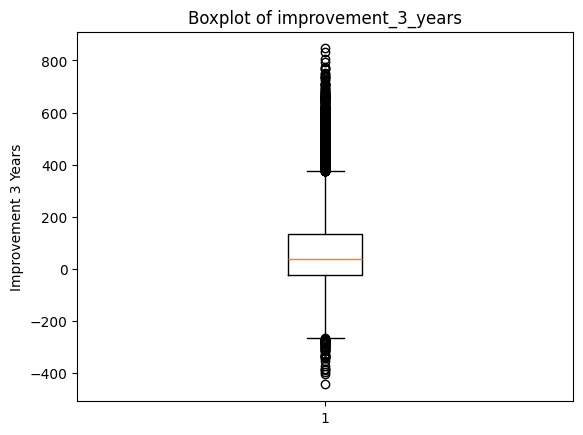

Median: 39.000
Q1: -24.000
Q3: 136.000


In [19]:
plt.boxplot(df['improvement_3_years'])
plt.title('Boxplot of improvement_3_years')
plt.ylabel('Improvement 3 Years')

plt.show()

median = df['improvement_3_years'].median()
q1 = df['improvement_3_years'].quantile(0.25)
q3 = df['improvement_3_years'].quantile(0.75)

print(f'Median: {median:.3f}')
print(f'Q1: {q1:.3f}')
print(f'Q3: {q3:.3f}')

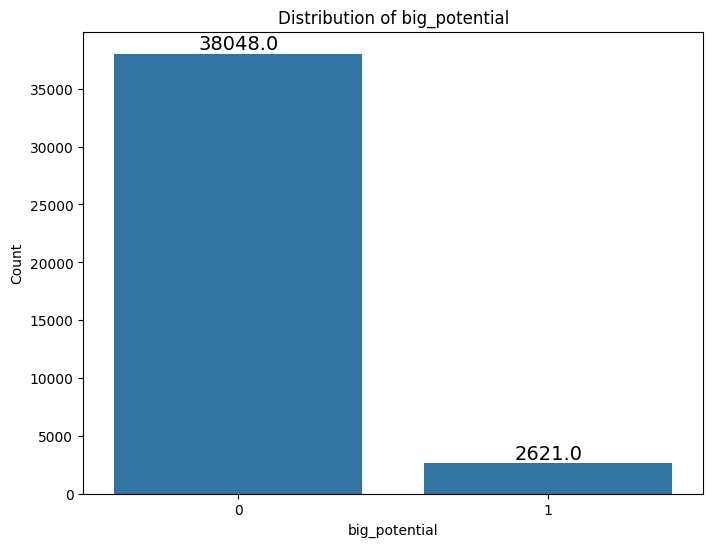

In [21]:
value_counts = df['big_potential'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='big_potential', data=df, order=value_counts.index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',  
                fontsize=14, color='black')

plt.title('Distribution of big_potential')
plt.xlabel('big_potential')
plt.ylabel('Count')

plt.show()


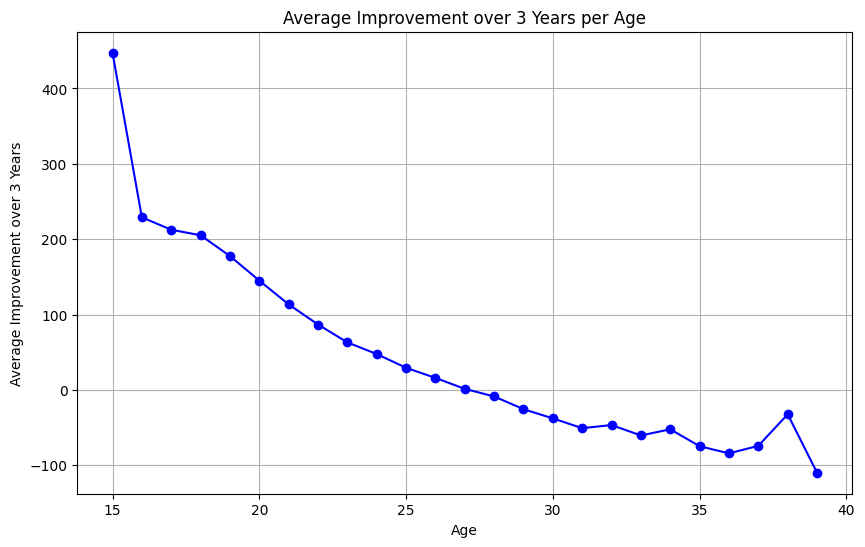

In [22]:
average_improvement = df.groupby('age')['improvement_3_years'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_improvement.index, average_improvement, marker='o', linestyle='-', color='b')

plt.title('Average Improvement over 3 Years per Age')
plt.xlabel('Age')
plt.ylabel('Average Improvement over 3 Years')

plt.grid(True)
plt.show()


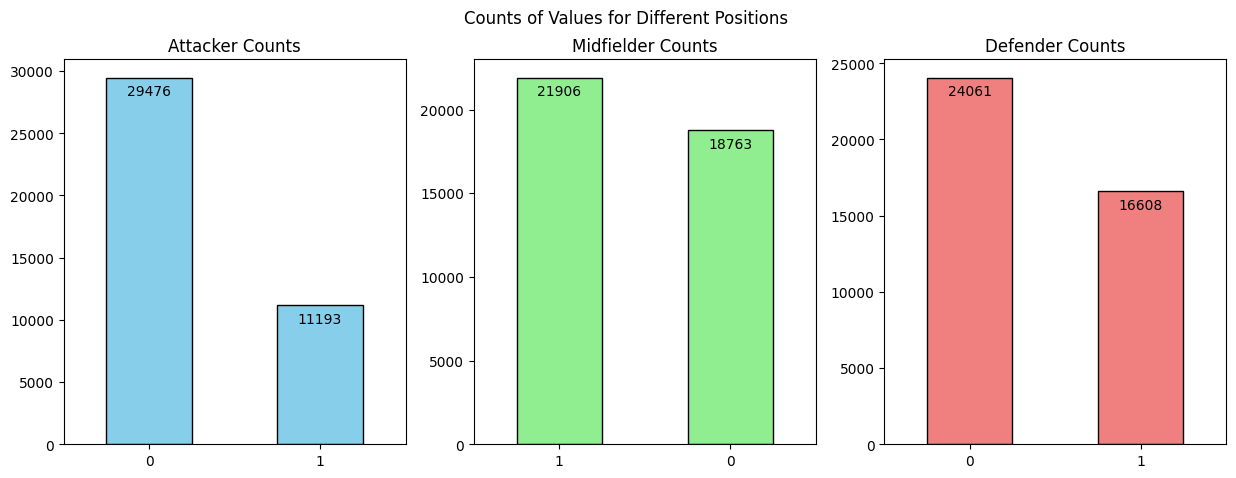

In [25]:
attacker_counts = df['Attacker'].value_counts()
midfielder_counts = df['Midfielder'].value_counts()
defender_counts = df['Defender'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

attacker_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black', title='Attacker Counts', rot=0)
midfielder_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black', title='Midfielder Counts', rot=0)
defender_counts.plot(kind='bar', ax=axes[2], color='lightcoral', edgecolor='black', title='Defender Counts', rot=0)

fig.suptitle('Counts of Values for Different Positions')

for ax in axes:
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -10), textcoords='offset points')

for ax in axes:
    ax.set_ylim(bottom=0)

plt.show()


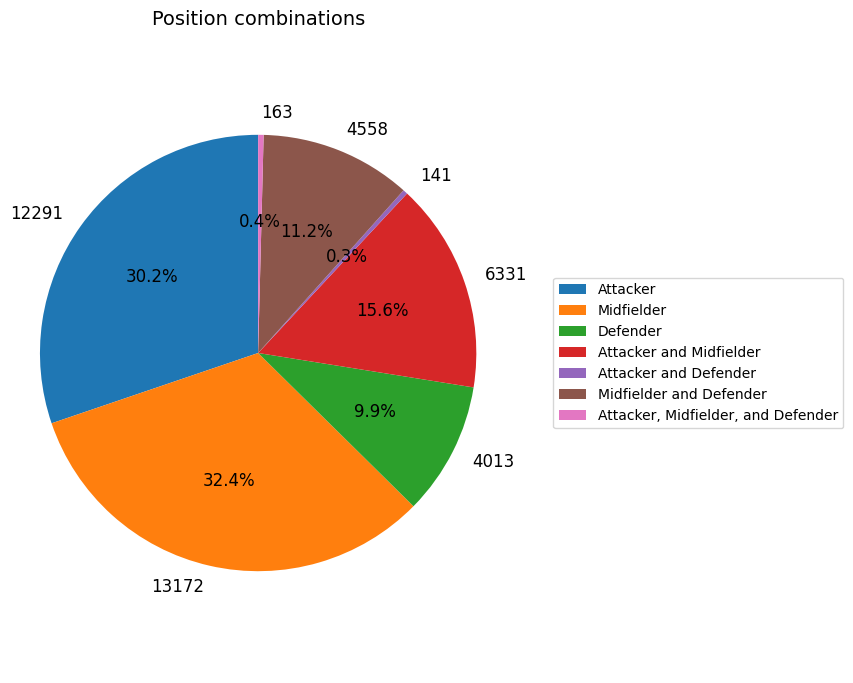

In [26]:

positive_values = df[['Attacker', 'Midfielder', 'Defender']]

combination_counts = positive_values.groupby(['Attacker', 'Midfielder', 'Defender']).size()

labels = [f"{count}" for count in combination_counts.values]
sizes = combination_counts.values

fig, ax = plt.subplots(figsize=(8, 8)) 
patches, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
)

for text in texts + autotexts:
    text.set_fontsize(12)  

ax.axis('equal')  

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

legend_labels = ['Attacker', 'Midfielder', 'Defender', 'Attacker and Midfielder', 'Attacker and Defender', 'Midfielder and Defender', 'Attacker, Midfielder, and Defender']
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1.1, 0.5)) 
plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)

plt.title('Position combinations', fontsize=14) 
plt.show()
